In [1]:
#Below is the list of libraries that we need for this project
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#Importing the dataset using read.csv function in pandas as below
shopper_data= pd.read_csv('shopping_intention_clean1.csv')

In [3]:
#Checking the basic info of the dataset for initial exploration
shopper_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,0,0


In [4]:
shopper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: flo

In [5]:
#Checking for any null values in the dataset.
shopper_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Text(0, 0.5, 'BounceRates')

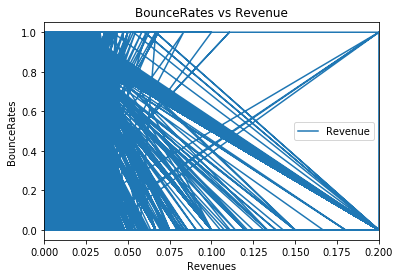

In [6]:
shopper_data.plot(x='BounceRates', y='Revenue')
plt.title('BounceRates vs Revenue')
plt.xlabel('Revenues')
plt.ylabel('BounceRates')
#plt.show

In [7]:
y = shopper_data['Revenue']
X = shopper_data[['BounceRates','PageValues','ExitRates','SpecialDay','Weekend','Region','TrafficType']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coefficients: 
 [ 8.70202617e-01  9.25241447e-03 -1.68565459e+00 -6.58522335e-02
  8.99350629e-03 -2.69962322e-03  1.87727171e-05]


,Coeffecient
BounceRates,0.870203
PageValues,0.009252
ExitRates,-1.685655
SpecialDay,-0.065852
Weekend,0.008994
Region,-0.002700
TrafficType,0.000019


In [8]:
linear_prediction = lm.predict(X_test)


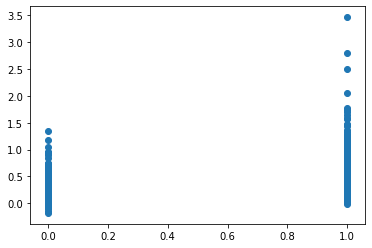

In [9]:
plt.scatter(x=y_test,y=linear_prediction)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#We can use cross validation instead of just dividing into splitting
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)
prediction_log = logmodel.predict(X_test)

C:\Users\dishu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
prediction_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction_log))
confusion_matrix(y_test, prediction_log)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3115
           1       0.76      0.35      0.48       584

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



array([[3051,   64],
       [ 379,  205]], dtype=int64)

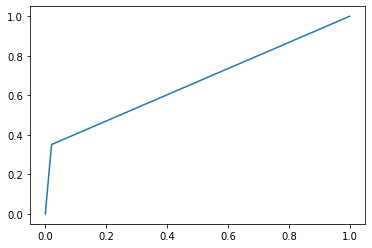

In [177]:

#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_log)
plt.plot(fpr,tpr)

In [179]:
#Checking AUC score for modelling
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, prediction_log))

0.6652408254359155


In [198]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, linear_prediction))
print('MSE:', metrics.mean_squared_error(y_test, linear_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_prediction)))

MAE: 0.20340463741448184
MSE: 0.09822698421566636
RMSE: 0.31341184440870506


In [199]:
from sklearn.metrics import r2_score
print('R2 Score or Coefficient of Determination is: ', r2_score(y_test,linear_prediction))

R2 Score or Coefficient of Determination is:  0.2611971280941421


In [256]:
 #Applying decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [247]:
from sklearn.metrics import classification_report,confusion_matrix
print('Precision and Accuracy: \n')
print(classification_report(y_test,predictions))
print('Confusion Matrix: \n')
print(confusion_matrix(y_test,predictions))
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state = 0)
rfc.fit(X_train,y_train)

Precision and Accuracy: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.10      0.97      0.19       117
           2       0.00      0.00      0.00       107
           3       0.00      0.00      0.00        81
           4       0.06      0.03      0.04        68
           5       0.00      0.00      0.00        76
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        73
           8       0.02      0.01      0.02        77
           9       0.03      0.02      0.02        57
          10       0.00      0.00      0.00        57
          11       0.00      0.00      0.00        53
          12       0.08      0.03      0.04        74
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        57
          15       0.03      0.02      0.02        56
          16       0.00      0.00      0.00        55
 

C:\Users\dishu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dishu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

 from sklearn.model_selection import GridSearchCV
 param_grid = [{'n_estimators': [3,1], 'max_features': [3,4,5]},
              {'bootstrap': [False], 'n_estimators': [6,1], 'max_features': [4,2,1]}]
from sklearn.ensemble import RandomForestRegressor
forest_grid = RandomForestRegressor()
 grid_search.fit(x_train, y_train)
predict_hyper = grid_search.predict(x_multi_test)
print(confusion_matrix(y_test,predict_hyper))
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=100)
rfc.fit(x_train,y_train)
 rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(shopper_data('Revenue',axis=1))
scaled_features = scaler.transform(shopper_data('Revenue',axis=1))
data_standard = pd.DataFrame(scaled_features,columns=shopper_data.columns[:-1])
data_standard.head()

TypeError: 'DataFrame' object is not callable